# Skin Cancer Detection Using CNN
***

- **This project aims to detect melanoma**, a type of skin cancer, using Convolutional Neural Networks (CNN). The model is trained on the HAM10000 dataset, which contains images of localized skin cells. It predicts whether a tumor in the input image is benign or malignant with an **accuracy of approximately 90%.**


### Model Architecture
- The Convolutional Neural Network (CNN) architecture used for this project consists of multiple convolutional layers followed by max-pooling layers for feature extraction. The extracted features are then passed through fully connected layers for classification. The model is trained using the HAM10000 dataset with appropriate data augmentation techniques to improve generalization.

### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

**Here, defining the folder paths for the training and testing datasets.**

In [2]:
train_path = 'dataset/melanoma_cancer_dataset/train'
test_path = 'dataset/melanoma_cancer_dataset/test'

- **train_path -->** Folder that contains training images

- **test_path -->** Folder that contains testing images

In [3]:
ds = keras.utils.image_dataset_from_directory(
    directory = train_path,
    batch_size= 32,
    image_size = (256, 256),
    shuffle =True,
)

Found 9605 files belonging to 2 classes.


- Means the training dataset has **9605 images** across **2 classes** (malignant and benign).

In [4]:
test= keras.utils.image_dataset_from_directory(
    directory = test_path,
    batch_size= 32,
    image_size= (256, 256),
    shuffle = True,
)

Found 1000 files belonging to 2 classes.


- so the test dataset has **1000 images** across **2 classes.**

### Data Splitting

In [5]:
DATASET_SIZE= len(ds)
TRAIN_RATIO, VALIDATION_RATIO = 0.8, 0.2
train = ds.take(int(DATASET_SIZE*TRAIN_RATIO))  # Selects the first 80% of dataset as training data.
val  = ds.skip(int(DATASET_SIZE*TRAIN_RATIO))   # Skips first 80%, keeps remaining 20% as validation data. 

print(len(train), len(val))

240 61


- **240 training batches and 61 validation batches.**

### Dataset Visualization

- import library for visualization

In [6]:
import matplotlib.pyplot as plt

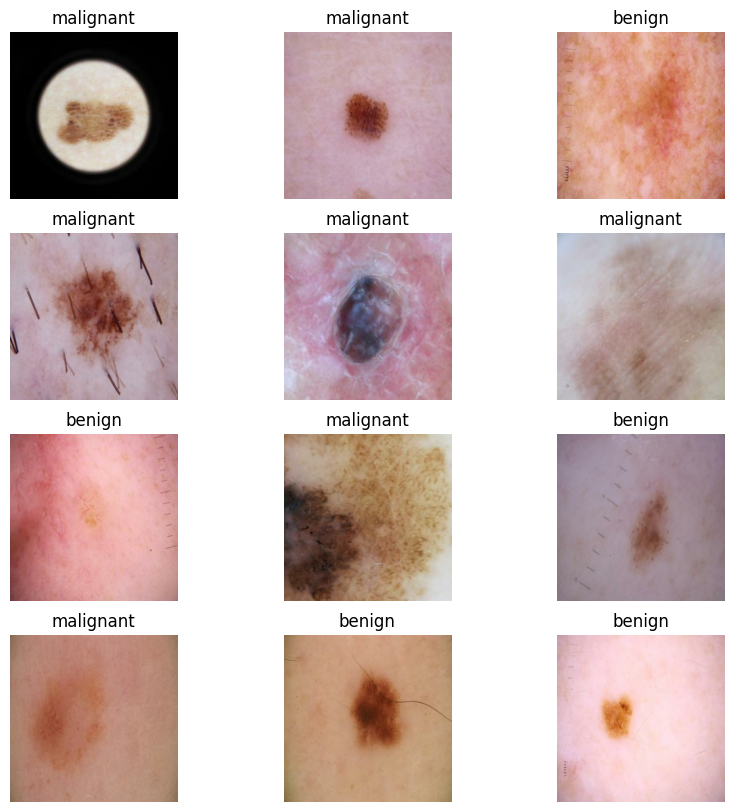

In [7]:
# 12 sample images

class_names = ds.class_names
plt.figure(figsize= (10,10))
for image_batch, label_batch in ds.take(1):
    for i in range(12):
        ax = plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]]); plt.axis('off')

- **A grid of 12 sample images** from the dataset, each with its label(benign or malignant).

### Model Building

- import required libraries

In [8]:
from keras.models import Sequential
from keras.layers import RandomFlip, RandomRotation
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input

In [9]:
Augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])

- Flips images **horizontal and vertical**, Rotates images randomly by 20%

In [10]:
def Normalizer(image, label):
    image= tf.cast(image/255., tf.float32)
    return image, label
train, val, test = train.map(Normalizer), val.map(Normalizer), test.map(Normalizer)

- Converts image pixels from **0-255 --> 0-1.**

- Ensures consistency for **training, validation, and testing sets.**

In [11]:
model = Sequential([
    Augmentation,
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=64, activation="relu"),
    Dense(units=2, activation="softmax"),
])


- Model uses **data augmentation**

- Multiple **Conv2D + MaxPooling** blocks make it deeper.

- Output has **2 classes** (softmax).

### Model Compilation

In [12]:
model.compile(
    optimizer= 'adam',
    loss=  'sparse_categorical_crossentropy',
    metrics = ['accuracy',]
)


### Early Stopping

In [13]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True,
)

### Model Training

In [14]:
history = model.fit(train, batch_size= 32, epochs=25, verbose=1, validation_data=val, callbacks=[early_stopping])

Epoch 1/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 151s 617ms/step - accuracy: 0.7611 - loss: 0.4679 - val_accuracy: 0.8327 - val_loss: 0.3839
Epoch 2/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 127s 529ms/step - accuracy: 0.8487 - loss: 0.3472 - val_accuracy: 0.8597 - val_loss: 0.3300
Epoch 3/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 125s 520ms/step - accuracy: 0.8594 - loss: 0.3300 - val_accuracy: 0.8608 - val_loss: 0.3213
Epoch 4/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 125s 519ms/step - accuracy: 0.8616 - loss: 0.3180 - val_accuracy: 0.8675 - val_loss: 0.3237
Epoch 5/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 123s 511ms/step - accuracy: 0.8706 - loss: 0.3071 - val_accuracy: 0.8722 - val_loss: 0.3091
Epoch 6/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 124s 516ms/step - accuracy: 0.8717 - loss: 0.2972 - val_accuracy: 0.8623 - val_loss: 0.3177
Epoch 7/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 122s 508ms/step - accuracy: 0.8758 - loss: 0.2968 - val_accuracy: 0.8790 - val_loss: 0.2888
Epoch 8/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 126s 526ms/step - accuracy: 0.8841 -

### Training & Validation

- **Accuracy Plot**

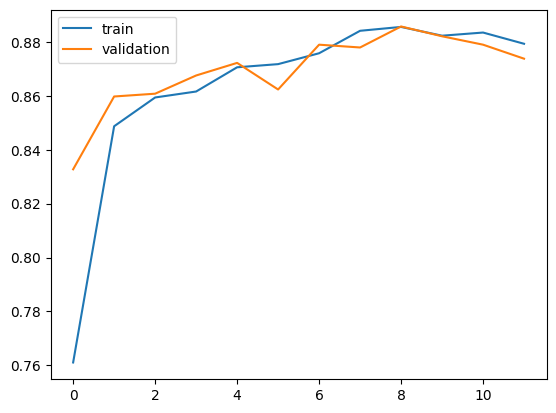

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.show()

### Model Evaluation

In [16]:
loss, accuracy = model.evaluate(test); print(loss, accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.8960 - loss: 0.2532
0.2531697452068329 0.8960000276565552


### Single Image Prediction

Actual Label:  benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted Label:  benign


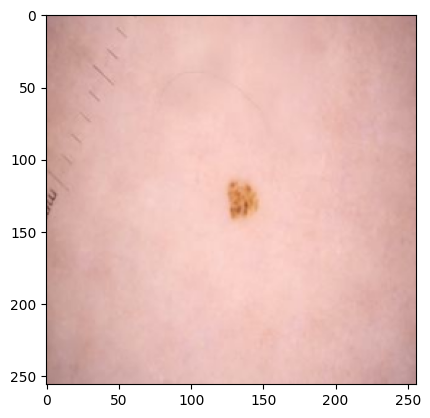

In [19]:
for images, label in test.take(1):
  img = (images[0]*255).numpy().astype('uint8')
  plt.imshow(img)
  print('Actual Label: ', class_names[label[0].numpy()])
  pred = model.predict(images)
  print('Predicted Label: ', class_names[np.argmax(pred[0])])

- Displays an image from test set

- Prints **actual vs predicted label.**

### Confusion Matric & Performance Evaluation

In [20]:
true, predicted = [], []
for images, labels in test:
    for img, label in zip(images, labels):
        true.append(label.numpy())
        pred = model.predict(tf.expand_dims(img, axis=0))
        predicted.append(np.argmax(pred[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

### Confusion Matric

In [21]:
from sklearn.metrics import confusion_matrix

<Axes: >

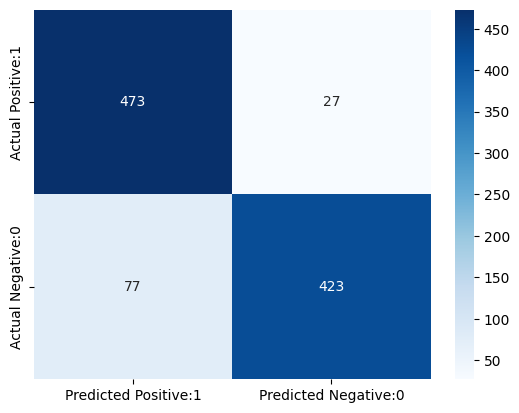

In [31]:
cm = confusion_matrix(true, predicted)
cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:1', 'Predicted Negative:0'], index=['Actual Positive:1', 'Actual Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt = 'd', cmap='Blues')

### Confusion Matric Results

- **True Positives   --> 475**

- **True Negatives   --> 436**

- **False Positives  --> 25**

- **False Negatives  --> 64**